<center><h1>实习岗位状况的分析</h1></center> 

<h2>1.分析目标</h2>

1.工作经验分析
<br>
2.学历分析
<br>
3.城市岗位需求量分析
<br>
4.薪资水平分析

<h2>2.分析内容</h2>

1.首先读取全部信息并去重;
<br>
2.然后提前对需要的信息并进行去空处理;
<br>
3.接着对提取的干净信息进行统计分析;
<br>
4.最后实现数据可视化。

<h2>3.分析步骤</h2>

<h3>3.1csv文件信息读取</h3>
<br>
读取文件信息并去重，保存成DataFrame格式;

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from pyecharts.charts import Bar
from pyecharts import options as opts
#设置中文标签的显示
plt.rcParams['font.sans-serif']=['SimHei']#设置显示中文字体

In [13]:
#读取job_list.csv中的有效字段的数据
job_list_data = pd.read_csv('job_list.csv')[['city','cname','day','maxsal','minsal','name']]
job_list_data

,city,cname,day,maxsal,minsal,name
0,武汉,武汉安天,4,120,80,数据挖掘工程师
1,武汉,武汉安天,4,150,100,数据挖掘实习生
2,广州,网易游戏,4,200,100,语料数据标注实习生-广州
3,北京,中科院软件所,4,200,120,安全工程师
4,深圳,IDataAPI,5,200,100,自然语言处理（NLP）实习生
...,...,...,...,...,...,...
218,北京,妙计旅行,5,240,140,数据挖掘实习生
219,北京,百度,5,200,150,百度数据挖掘工程师实习生
220,北京,Baca,4,370,350,数据挖掘实习生
221,北京,汽车之家,4,180,140,数据分析实习生


In [21]:
#读取job_detailed.csv中有效字段的数据
job_detailed_data=pd.read_csv('job_detailed.csv')[['city','cname','day','degree','iname','industry','maxsal','minsal','month','attraction']]
job_detailed_data

,city,cname,day,degree,iname,industry,maxsal,minsal,month,attraction
0,武汉,武汉安天,4,本科,数据挖掘工程师,互联网,120,80,3,弹性工作 周末双休 咖啡下午茶
1,武汉,武汉安天,4,硕士,数据挖掘实习生,互联网,150,100,3,弹性工作制
2,广州,网易游戏,4,本科,语料数据标注实习生-广州,互联网,200,100,8,网络游戏 知名公司 导师制 免费三餐
3,北京,中科院软件所,4,硕士,安全工程师,计算机/互联网,200,120,6,舒适办公环境 领先技术水平 优秀团队 科研单位
4,深圳,IDataAPI,5,本科,自然语言处理（NLP）实习生,企业服务,200,100,6,你将获得持续不断的挑战与能力提升，并与志同道合的伙伴并肩作战
...,...,...,...,...,...,...,...,...,...,...
218,北京,妙计旅行,5,本科,数据挖掘实习生,在线旅游,240,140,6,大牛带队，成长迅速，包三餐
219,北京,百度,5,本科,百度数据挖掘工程师实习生,互联网,200,150,6,福利待遇好 有转正机会
220,北京,Baca,4,本科,数据挖掘实习生,互联网,370,350,3,"出海项目,美金投资,团队大牛,学习成长"
221,北京,汽车之家,4,本科,数据分析实习生,互联网,180,140,4,足够强大的平台！


In [22]:
print("原始行数:",len(job_detailed_data))

原始行数: 223


In [23]:
#去重，并生成新索引删除原索引
job_detailed_data=job_detailed_data.drop_duplicates().reset_index().drop('index',axis=1)
print('现在数据行数:',len(job_detailed_data))
job_detailed_data

现在数据行数: 200


,city,cname,day,degree,iname,industry,maxsal,minsal,month,attraction
0,武汉,武汉安天,4,本科,数据挖掘工程师,互联网,120,80,3,弹性工作 周末双休 咖啡下午茶
1,武汉,武汉安天,4,硕士,数据挖掘实习生,互联网,150,100,3,弹性工作制
2,广州,网易游戏,4,本科,语料数据标注实习生-广州,互联网,200,100,8,网络游戏 知名公司 导师制 免费三餐
3,北京,中科院软件所,4,硕士,安全工程师,计算机/互联网,200,120,6,舒适办公环境 领先技术水平 优秀团队 科研单位
4,深圳,IDataAPI,5,本科,自然语言处理（NLP）实习生,企业服务,200,100,6,你将获得持续不断的挑战与能力提升，并与志同道合的伙伴并肩作战
...,...,...,...,...,...,...,...,...,...,...
195,北京,妙计旅行,5,本科,数据挖掘实习生,在线旅游,240,140,6,大牛带队，成长迅速，包三餐
196,北京,百度,5,本科,百度数据挖掘工程师实习生,互联网,200,150,6,福利待遇好 有转正机会
197,北京,Baca,4,本科,数据挖掘实习生,互联网,370,350,3,"出海项目,美金投资,团队大牛,学习成长"
198,北京,汽车之家,4,本科,数据分析实习生,互联网,180,140,4,足够强大的平台！


In [26]:
#提取需要的字段并去空
job_detailed_data=job_detailed_data[['city','cname','day','degree','iname','industry','maxsal','minsal','month','attraction']]
job_detailed_data.head()
print('现在数据行数:',len(job_detailed_data))

现在数据行数: 200


<h2>4.数据分析</h2>

<h3>4.1学历与岗位数量</h3>

degree=job_detailed_data['degree'].value_counts()
degree

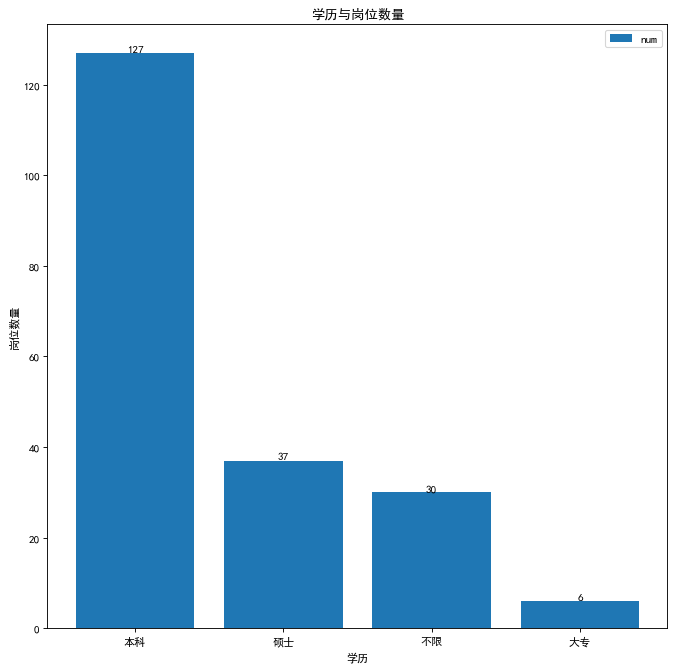

In [60]:
plt.figure(figsize=(10, 10), dpi=80)
x = degree[:15].index
y = degree[:15].values
p = plt.bar(x, y, label="num")
for x,y in zip(x,y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom')
plt.xlabel('学历')
plt.ylabel('岗位数量')
plt.title('学历与岗位数量')
plt.legend(loc="upper right")
plt.show()

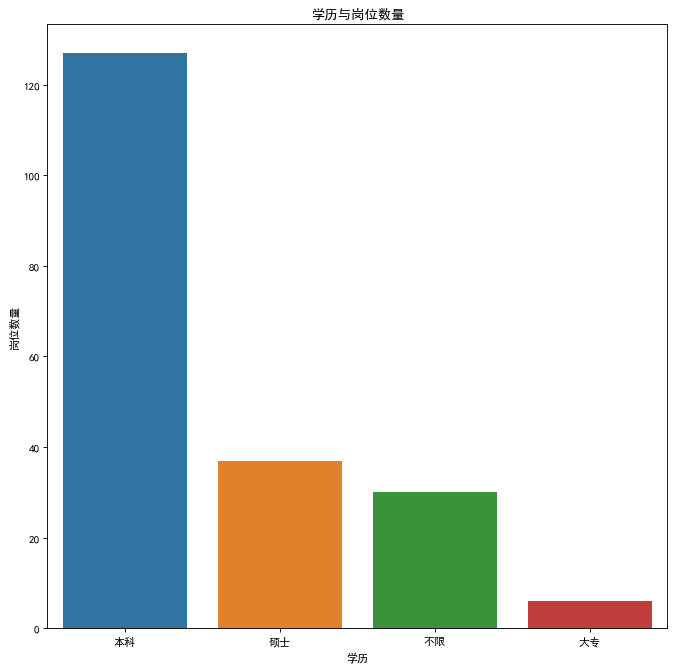

In [61]:
plt.figure(figsize=(10, 10), dpi=80)
x = degree[:15].index
y = degree[:15].values
sns.barplot(x=x, y=y, data=job_detailed_data,capsize=.05)
plt.xlabel('学历')
plt.ylabel('岗位数量')
plt.title('学历与岗位数量')
plt.show()

<h3>结论</h3>
<br>
绝大多数岗位对实习生的学历要求是本科及以上，对学历要求是硕士的岗位数量和对学历不做要求差不多，极少数岗位对学历的最低要求是大专。

<h3>4.2城市与岗位数量</h3>

In [63]:
city=job_detailed_data['city'].value_counts()
city

北京                   96
上海                   42
广州                   14
深圳                    9
武汉                    7
杭州                    4
合肥                    4
成都                    3
南京                    3
宁波                    2
青岛                    2
全国                    2
西安                    2
重庆                    1
北京,武汉                 1
北京,上海                 1
厦门                    1
广州,福州,厦门,深圳,上海,苏州     1
,上海                   1
苏州                    1
天津                    1
福州                    1
珠海                    1
Name: city, dtype: int64

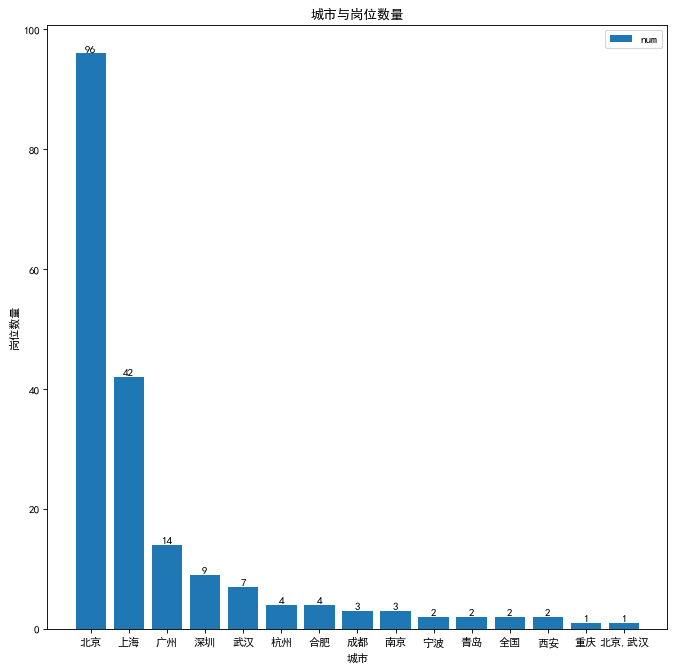

In [64]:
plt.figure(figsize=(10, 10), dpi=80)
x = city[:15].index
y = city[:15].values
p = plt.bar(x, y, label="num")
for x,y in zip(x,y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom')
plt.xlabel('城市')
plt.ylabel('岗位数量')
plt.title('城市与岗位数量')
plt.legend(loc="upper right")
plt.show()

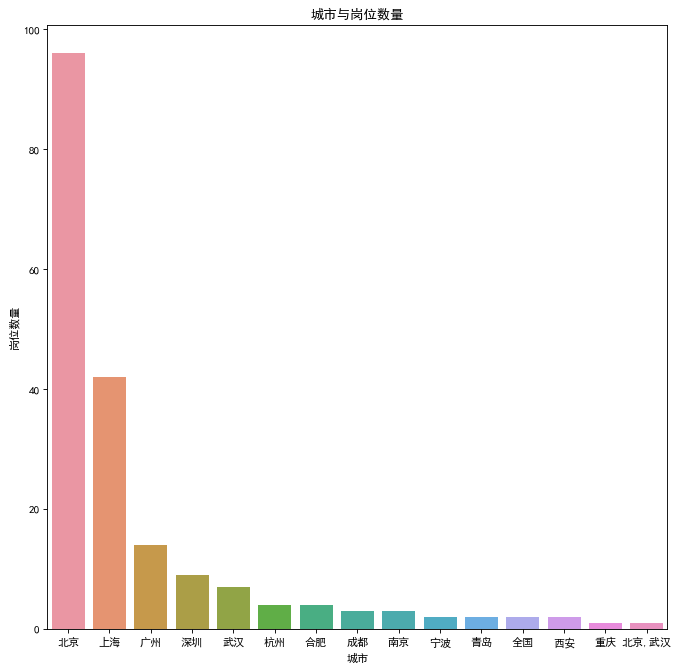

In [65]:
plt.figure(figsize=(10, 10), dpi=80)
x = city[:15].index
y = city[:15].values
sns.barplot(x=x, y=y, data=job_detailed_data,capsize=.05)
plt.xlabel('城市')
plt.ylabel('岗位数量')
plt.title('城市与岗位数量')
plt.show()